In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import scipy
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("."))
PATH = "."
# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'forest_eda_rf.ipynb', 'test.csv', 'train.csv']


In [14]:
df = pd.read_csv(f"{PATH}/train.csv")

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,15120.0,7560.500000,4364.912370,1.0,3780.75,7560.5,11340.25,15120.0
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.00,2752.0,3104.00,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.00,126.0,261.00,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.00,15.0,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.00,180.0,330.00,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.00,32.0,79.00,554.0
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.00,1316.0,2270.00,6890.0
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.00,220.0,235.00,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.00,223.0,235.00,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.00,138.0,167.00,248.0


In [16]:
y = df.Cover_Type
df.drop(["Id", "Cover_Type"], axis=1, inplace=True)

In [17]:
cols = df.columns.values

In [18]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(df, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
rf_classifier.score(df, y)

0.9939153439153439

In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(df, y, test_size=0.3, random_state = 7)
X_train = X_train.values
X_valid = X_valid.values
y_train = y_train.values
y_valid = y_valid.values

In [21]:
unique, counts = np.unique(y_train, return_counts=True)

print (np.asarray((unique, counts)).T)

[[   1 1516]
 [   2 1530]
 [   3 1489]
 [   4 1526]
 [   5 1499]
 [   6 1494]
 [   7 1530]]


In [22]:
def print_score(m):
    print ("train:",m.score(X_train,y_train), "valid:", m.score(X_valid, y_valid), "oob: ", m.oob_score_)

## Baseline Classifier

In [23]:
rf_classifier = RandomForestClassifier(oob_score=True)
rf_classifier.fit(X_train, y_train)
print_score(rf_classifier)

train: 0.9958427815570673 valid: 0.8240740740740741 oob:  0.7582199546485261


C:\Users\bguaman\AppData\Local\Continuum\anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\bguaman\AppData\Local\Continuum\anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


## Impact of number of trees

In [24]:
rf_classifier = RandomForestClassifier(n_estimators = 100, oob_score=True)
rf_classifier.fit(X_train, y_train)
print_score(rf_classifier)

train: 1.0 valid: 0.8571428571428571 oob:  0.8484504913076342


In [25]:
preds = np.stack([t.predict(X_valid) for t in rf_classifier.estimators_])

In [26]:
preds[:,0], scipy.stats.mode(preds[:,0])[0], y_valid[0]

(array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 6., 0., 6., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 6., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0.]),
 1)

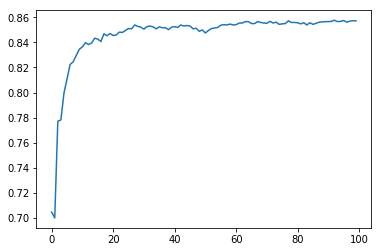

In [27]:
plt.plot([accuracy_score(y_valid, scipy.stats.mode(preds[:i+1], axis=0)[0][0]+1) for i in range(len(rf_classifier.estimators_))]);

## Reducing Overfitting

In [28]:
c = RandomForestClassifier(min_samples_leaf=3, n_estimators=100, max_features=0.5, oob_score=True)
c.fit(X_train, y_train)
print_score(c)

train: 0.9726946334089192 valid: 0.845679012345679 oob:  0.8435374149659864


### Inspection

In [29]:
cm = confusion_matrix(y_valid, c.predict(X_valid))

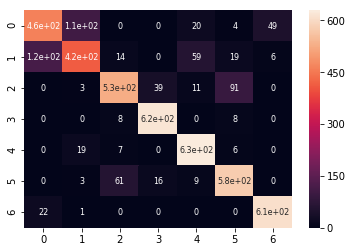

In [30]:
sns.heatmap(cm, annot=True, annot_kws={"size": 8});

### Feature Importance

In [31]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [32]:
fi = rf_feat_importance(c, df); fi[:15]

,cols,imp
0,Elevation,0.356657
5,Horizontal_Distance_To_Roadways,0.087929
9,Horizontal_Distance_To_Fire_Points,0.072026
3,Horizontal_Distance_To_Hydrology,0.065257
13,Wilderness_Area4,0.052253
6,Hillshade_9am,0.045353
4,Vertical_Distance_To_Hydrology,0.042902
1,Aspect,0.035276
7,Hillshade_Noon,0.032632
8,Hillshade_3pm,0.029580


In [33]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

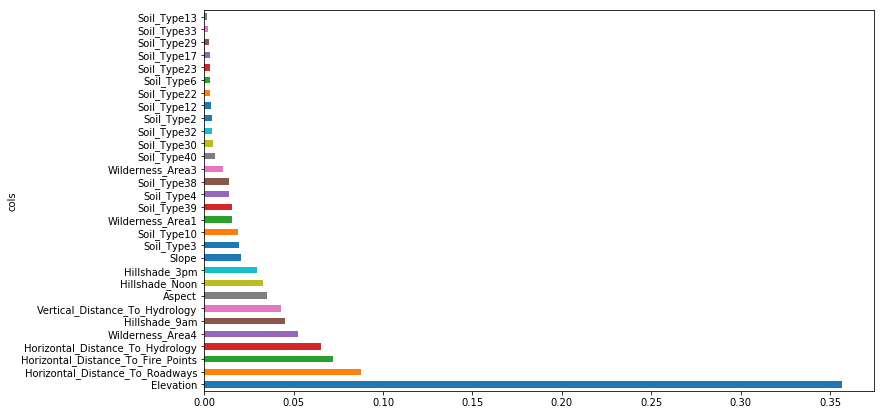

In [34]:
plot_fi(fi[:30]);

## Adding Features

In [35]:
def add_features(df):
    df['HF1'] = df['Horizontal_Distance_To_Hydrology']+df['Horizontal_Distance_To_Fire_Points']
    df['HF2'] = abs(df['Horizontal_Distance_To_Hydrology']-df['Horizontal_Distance_To_Fire_Points'])
    df['HR1'] = abs(df['Horizontal_Distance_To_Hydrology']+df['Horizontal_Distance_To_Roadways'])
    df['HR2'] = abs(df['Horizontal_Distance_To_Hydrology']-df['Horizontal_Distance_To_Roadways'])
    df['FR1'] = abs(df['Horizontal_Distance_To_Fire_Points']+df['Horizontal_Distance_To_Roadways'])
    df['FR2'] = abs(df['Horizontal_Distance_To_Fire_Points']-df['Horizontal_Distance_To_Roadways'])
    df['ele_vert'] = df.Elevation-df.Vertical_Distance_To_Hydrology

    df['slope_hyd'] = (df['Horizontal_Distance_To_Hydrology']**2+df['Vertical_Distance_To_Hydrology']**2)**0.5
    df.slope_hyd=df.slope_hyd.map(lambda x: 0 if np.isinf(x) else x) # remove infinite value if any

    #Mean distance to Amenities 
    df['Mean_Amenities']=(df.Horizontal_Distance_To_Fire_Points + df.Horizontal_Distance_To_Hydrology + df.Horizontal_Distance_To_Roadways) / 3 
    #Mean Distance to Fire and Water 
    df['Mean_Fire_Hyd']=(df.Horizontal_Distance_To_Fire_Points + df.Horizontal_Distance_To_Hydrology) / 2
    return df

In [36]:
df = add_features(df)

In [37]:
X_train, X_valid, y_train, y_valid = train_test_split(df, y, test_size=0.3, random_state = 7)
X_train.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [38]:
c = RandomForestClassifier(min_samples_leaf=3, n_estimators=100, max_features=0.5, oob_score=True)
c.fit(X_train, y_train)
print_score(c)

train: 0.9790249433106576 valid: 0.8648589065255732 oob:  0.8638510959939532


In [39]:
fi = rf_feat_importance(c, X_train)

In [40]:
fi[:20]

,cols,imp
0,Elevation,0.217947
60,ele_vert,0.210011
6,Hillshade_9am,0.041614
58,FR1,0.036839
61,slope_hyd,0.032732
59,FR2,0.031017
62,Mean_Amenities,0.030866
57,HR2,0.030354
1,Aspect,0.024503
7,Hillshade_Noon,0.023564


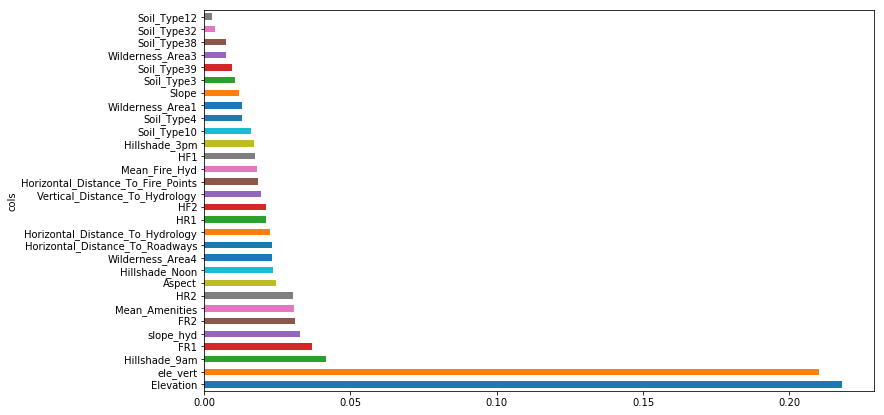

In [41]:
plot_fi(fi[:30])

In [42]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

28

In [43]:
df_keep = df[to_keep].copy()
X_train, X_valid, y_train, y_valid = train_test_split(df_keep, y, test_size=0.3, random_state = 7)

In [44]:
c = RandomForestClassifier(min_samples_leaf=3, n_estimators=100, max_features=0.5, oob_score=True)
%time c.fit(X_train, y_train)
print_score(c)

Wall time: 7.69 s
train: 0.9774187452758881 valid: 0.8600088183421517 oob:  0.8594104308390023


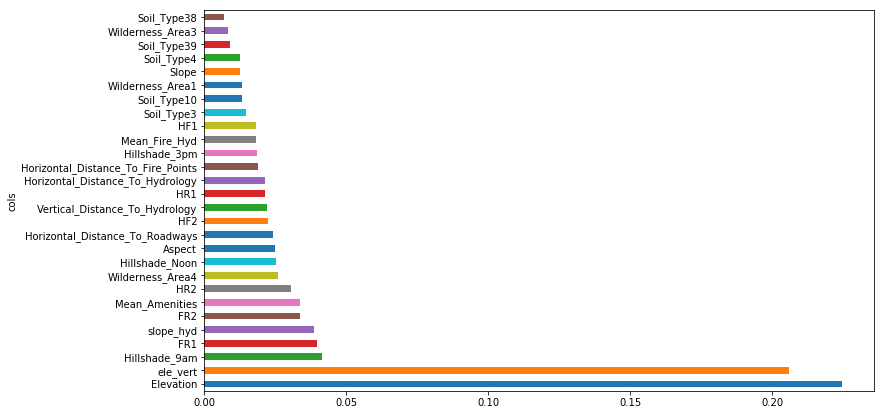

In [45]:
fi = rf_feat_importance(c, X_train)
plot_fi(fi)

## Creating test preds

In [46]:
c = RandomForestClassifier(min_samples_leaf=3, n_estimators=100, max_features=0.5, oob_score=True)
%time c.fit(df_keep, y)
print_score(c)

Wall time: 11.9 s
train: 0.9794973544973545 valid: 0.9817019400352733 oob:  0.8716269841269841


In [47]:
X_test = pd.read_csv(f"{PATH}/test.csv")

In [48]:
X_test = add_features(X_test)
test = X_test[to_keep].copy()

In [49]:
test_preds = c.predict(test)

In [50]:
res = pd.DataFrame({"Id": X_test.Id, "Cover_Type": test_preds})

In [51]:
res.to_csv(f"submission_rf_new_features.csv", index=False)